In [1]:
# importing libraries

import matplotlib.pyplot as plt
import csv

In [22]:
network_throughput_values = []
ganache_throughput_values = []

ganache_speculated_values = []

ratio = 0.0

In [23]:
def calculate_average_network_values() -> float:
    with open("./throughput.csv") as f:
        data = csv.reader(f, delimiter=',')
        for dataval in data:
            if(dataval[1] != 'time'):
                ganache_throughput_values.append(float(dataval[1]))
    with open("../Analyse-Networks/main_polygon.csv") as f:
        data = csv.reader(f, delimiter=',')
        for dataval in data:
            if(dataval[0] == "GetSelfKeys"):
                network_throughput_values.append(float(dataval[1]))
    ratio = sum(network_throughput_values)/sum(ganache_throughput_values)
    return ratio*10

ratio = calculate_average_network_values()

print("Network Throughput Values : ", network_throughput_values)
print("Ganache Throughput Values : ",ganache_throughput_values)
print("Needed Ratio : ", ratio)

Network Throughput Values :  [21.020720958709717, 8.806632995605469, 14.220090866088867, 15.574299812316895, 12.664725065231323]
Ganache Throughput Values :  [0.40123891830444336, 0.6677430152893067, 2.8090786933898926, 3.4592113494873047, 4.572136402130127]
Needed Ratio :  60.69694429812081


In [24]:
def calculate_speculated_values():
    for val in ganache_throughput_values:
        ganache_speculated_values.append(val*ratio)

calculate_speculated_values()

print("Ganache Speculated Values :", ganache_speculated_values)

Ganache Speculated Values : [24.353976274563045, 40.52996060447428, 170.5024929817243, 209.96355859525826, 277.5147085235028]


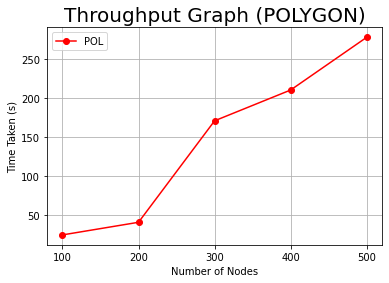

In [26]:
throughput_y_axis = ganache_speculated_values
throughput_x_axis = ['100','200','300','400','500']

# Throughput Graph
plt.plot(throughput_x_axis, throughput_y_axis,
         color="r", linestyle="solid", marker='o', label="POL")
plt.ylabel('Time Taken (s)')
plt.xlabel('Number of Nodes')
plt.title("Throughput Graph (POLYGON)", fontsize=20)
plt.grid()
plt.legend()
plt.show()